In [88]:
import os
print "hey"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

hey


In [89]:
directory = "../data/"
files = os.listdir(directory)
print files

['profile2.data', 'profile_N11.data', 'profile1.data', 'profile_N5.data', 'profile_N9.data', 'profile_N3.data', 'profile_10_12', 'profile_N7.data']


In [90]:
# fname = files[0]

# fp = open(directory + fname, "r+")
# utime = []
# stime = []
# major_pf = []
# minor_pf = []

# for line in fp:
#     datas = line.strip().split(" ")
#     # datas = line
#     if len(datas) != 4 or datas[0] == 'read':
#         print datas
#         continue # continue
#     major_pf.append(int(datas[0]))
#     minor_pf.append(int(datas[1]))
#     utime.append(int(datas[2]))
#     stime.append(int(datas[3]))

# x_label = [0.05 * i for i in range(len(utime))]
# #print utime


In [91]:
# plot x-axis = N, y axis = metrics
def paint(fn, plot_datas, mode):
    
    # print plot_datas[0]
    
    if mode == 1: # plot N - final result
        #do
        # print "shape of array", plot_datas[plot_datas.keys[0]].shape()
        
        
        x_label = plot_datas.keys() #N
        print "this is tested N: " + str(x_label)
        range_limit = 9999999999
        for i in x_label:
            range_limit = min(range_limit, len(plot_datas[i][0]))
        print "range limit %d" % range_limit
        plot_data = []
        
        data_index = range_limit - 1
        for typeindex in range(4):
            plot_data.append([plot_datas[i][typeindex][data_index] for i in x_label ])
        print plot_data
        
        plt.title("N - page fault")
        plt.plot( x_label, plot_data[0], "r+", x_label, plot_data[1], "ro")  # pg_flt - N 
        plt.xlabel("N")
        plt.ylabel("data-page fault happened at the end")
        plt.show()
        
        plt.title("N - cpu time")
        plt.plot( x_label, plot_data[2], 'g+', x_label, plot_data[3], 'go')
        plt.xlabel("N")
        plt.ylabel("cpu time")
        plt.show()
    else:
        title1 = fn + "- time - page fault"
        title2 = fn + "- time - cput time"
        rang = len(plot_datas[0])
        print rang
        x_label = [0.05 * i for i in range(rang)]
        
        plt.title(title1)
        plt.plot( x_label, plot_datas[0], "r+", x_label, plot_datas[1], "ro")  # pg_flt
        plt.xlabel("time(s)")
        plt.ylabel("data-page fault")
        plt.show()
        
        plt.title(title2)
        plt.plot( x_label, plot_datas[2], 'g+', x_label, plot_datas[3], 'go')
        plt.xlabel("times(s)")
        plt.ylabel("cpu time")
        plt.show()
        

N = 11
['output_filename', 'is', 'output-12:41:39.', 'Check', 'that', 'after', 'the', 'program', 'finished.']
['try', 'to', 'open', 'the', 'char', 'dev', '-', 'node', 'file..']
['read', '1008', 'profiled', 'data']
data read finished for file profile_N11.data, 1008 lines of data read in 
1008
N = 5
['output_filename', 'is', 'output-12:22:14.', 'Check', 'that', 'after', 'the', 'program', 'finished.']
['try', 'to', 'open', 'the', 'char', 'dev', '-', 'node', 'file..']
['read', '1006', 'profiled', 'data']
data read finished for file profile_N5.data, 1006 lines of data read in 
1006
N = 9
['output_filename', 'is', 'output-13:16:32.', 'Check', 'that', 'after', 'the', 'program', 'finished.']
['try', 'to', 'open', 'the', 'char', 'dev', '-', 'node', 'file..']
['read', '1007', 'profiled', 'data']
data read finished for file profile_N9.data, 1007 lines of data read in 
1007
N = 3
['output_filename', 'is', 'output-12:48:39.', 'Check', 'that', 'after', 'the', 'program', 'finished.']
['try', 'to', 'o

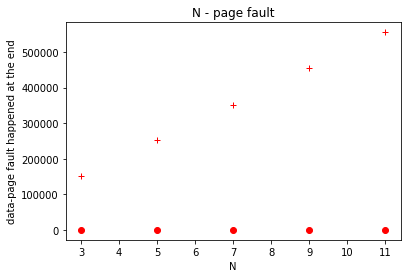

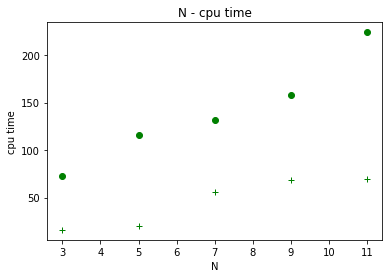

finished


In [92]:
# for N iterations: 

def readData(data, directory, fn):
    fp = open(directory + fn, "r+")
    data.append([]) # minor fault
    data.append([]) # major fault
    data.append([]) # utime
    data.append([]) # stime
    # print data
    for line in fp:
        data_line = line.strip().split(" ")
        # datas = line
        if len(data_line) != 4 or data_line[0] == 'read' or data_line[0] == 'file':
            print data_line
            continue # continue
        data[0].append(int(data_line[0]))
        data[1].append(int(data_line[1]))
        data[2].append(int(data_line[2]))
        data[3].append(int(data_line[3]))
    print "data read finished for file %s, %d lines of data read in " % (fn, len(data[0]))
    fp.close()


fnames = []
datas_exp3 = {} # N related
fn_exp3 = {}
datas_exp12 = {} # experiments

for f in files:
    index = f.find("N")
    if index != -1:
        s = f[index:]
        s = s.split(".")[0][1:]
        print "N = " + s # N
        N = int(s)
        data = []
        datas_exp3[N] = data
        fn_exp3[N] = f
        readData(data, directory, f)
        print len(datas_exp3[N][0]) # test
    else:  # experiment 1 & 2
        continue
        N = int(f.split(".")[0][-1])
        data = []
        datas_exp12[N] = data
        readData(data, directory, f)
    
def paint_tool(exp, idx, mode):
    if exp == 3:
        if mode == 1: # print N relation
            paint(fn_exp3, datas_exp3, mode)
        else:
            paint(fn_exp3[idx], datas_exp3[idx], mode)
    else: # exp == 1
        paint(fn_exp12[idx], datas_exp12[idx], 0)

# experiment 3, N = 5
# paint_tool(3, 5, 0)

# experiment 3, N = 3 5 11
paint_tool(3, 0, 1)

print "finished" 

In [93]:
# plt.title(file)
# plt.plot( x_label, major_pf, "go", x_label, minor_pf, "g+")
# plt.xlabel("time")
# plt.ylabel("data-page fault")
# plt.show()
# plt.plot(x_label, utime, "ro", x_label, stime, "rx")
# plt.xlabel("time")
# plt.ylabel("data-cputime")
# plt.title(file)
# plt.show()